In [2]:
import refexps
from os import listdir, path
from itertools import combinations
from collections import defaultdict
import numpy as np
from scipy import stats
from refexps import get_previous

In [3]:
### MOVE LEVEL ###
def compute_values_move(refexps_dir, success_dir):
    move_level_data = defaultdict(dict)
    move_level_align = []
    move_level_variation = []
    playermove_level_align_speaker = defaultdict(list)
    playermove_level_variation_speaker= defaultdict(list) 
    for dialogue in listdir(refexps_dir):
        dialogue = path.join(refexps_dir, dialogue)
        dialogue = refexps.load_data(dialogue)
        #move level
        dialogue_move = refexps.move_level(dialogue)
        for move in dialogue_move:
            refs = move[1]
            for obj in refs:
                align_speaker = {}
                total_n = len(refs[obj])
                sameform_n =0
                ignore = 0
                entropy_speaker = defaultdict(int)
                total_n_speaker = defaultdict(int)
                sameform_n_speaker = defaultdict(int)
                ignore_speaker = defaultdict(int)
                obj_forms_speaker = defaultdict(dict)
                obj_forms = defaultdict(int)
                for ref in refs[obj]:
                    obj_forms[ref[3]] += 1
                    speaker = ref[1]
                    if not obj_forms_speaker[speaker].has_key(ref[3]):
                        obj_forms_speaker[speaker][ref[3]] = 0
                    obj_forms_speaker[speaker][ref[3]] += 1
                    align_speaker[speaker] = 0
                    total_n_speaker[speaker] +=1
                    if get_previous(ref, refs[obj]) == 'no_previous':
                            ignore += 1
                            ignore_speaker[speaker] += 1
                    else: 
                        if ref[3] == get_previous(ref, refs[obj])[3]:
                            sameform_n +=1
                            sameform_n_speaker[speaker] += 1
                sum_forms = sum(obj_forms.values())
                for form in obj_forms:
                    obj_forms[form] = float(obj_forms[form])/float(sum_forms)
                obj_forms = obj_forms.values()
                variation = stats.entropy(obj_forms)
                #movelevel variation and alignment (for each object)
                ntotal_n = total_n - ignore
                if ntotal_n != 0:
                    align = float(sameform_n) / ntotal_n
                    move_level_align.append(align)
                for s in align_speaker:
                    ntotal_n = total_n_speaker[s] - ignore_speaker[s]
                    if ntotal_n != 0:
                        align = float(sameform_n_speaker[s]) / ntotal_n 
                        playermove_level_align_speaker[s].append(align)
                move_level_variation.append(variation)
                variation_speaker = {}
                for s in obj_forms_speaker:
                    sum_forms = sum(obj_forms_speaker[s].values())
                    for form in obj_forms_speaker[s]:
                        obj_forms_speaker[s][form] = float(obj_forms_speaker[s][form])/float(sum_forms)
                    obj_forms_speaker[s] = obj_forms_speaker[s].values()
                    variation_speaker[s] = stats.entropy(obj_forms_speaker[s])
                for s in variation_speaker:
                    playermove_level_variation_speaker[s].append(np.mean(variation_speaker[s]))
                
    move_level_align_all = []
    move_level_variation_all = []
    playermove_level_align_speaker_all = defaultdict(list)
    playermove_level_variation_speaker_all = defaultdict(list)
    results_move = defaultdict(list)
    move_level_align_all += move_level_align
    move_level_variation_all += move_level_variation
    playermove_level_variation = []
    
    for s in playermove_level_variation_speaker:
        playermove_level_variation += playermove_level_variation_speaker[s]
        playermove_level_variation_speaker_all[s] += playermove_level_variation_speaker[s]
        results_move['Move variation '+ s] = playermove_level_variation_speaker[s]
        
    results_move['Move players variation'] = playermove_level_variation
    results_move['Move variation'] = move_level_variation
    
    playermove_level_align = []
    for s in playermove_level_align_speaker:
        playermove_level_align += playermove_level_align_speaker[s]
        playermove_level_align_speaker_all[s] += playermove_level_align_speaker[s]
        results_move['Move alignment '+ s] = playermove_level_align_speaker[s]
    results_move['Move players alignment'] = playermove_level_align
    results_move['Move alignment'] = move_level_align
    
    for value in results_move:
        dataset = results_move[value]
        print '\t'+ value + ': '
        print '\tMean: '+ str(np.mean(dataset)) +'\tVariance: '+ str(np.std(dataset))
        print '\tMax value: ' + str(max(dataset)) + '\tMin value: '+ str(min(dataset))
    return results_move

In [4]:
de_dataset_dir = 'En_De_Dataset/De/RefExp'
de_success_dir = 'En_De_Dataset/De/Success'

en_dataset_dir = 'En_De_Dataset/En/RefExp'
en_success_dir = 'En_De_Dataset/En/Success'

all_dataset_dir = 'En_De_Dataset/All/RefExp'
all_success_dir = 'En_De_Dataset/All/Success'

results_de = compute_values_move(de_dataset_dir, de_success_dir)
print '\n\n'
results_en = compute_values_move(en_dataset_dir, en_success_dir)
print '\n\n'
results_all = compute_values_move(all_dataset_dir, all_success_dir)

	Move variation: 
	Mean: 0.372424900963	Variance: 0.435927559258
	Max value: 1.74786809747	Min value: 0.0
	Move alignment e-utts: 
	Mean: 0.46915310428	Variance: 0.465551152948
	Max value: 1.0	Min value: 0.0
	Move alignment p-utts: 
	Mean: 0.408606557377	Variance: 0.460014223302
	Max value: 1.0	Min value: 0.0
	Move variation e-utts: 
	Mean: 0.226434450519	Variance: 0.36375361773
	Max value: 1.38629436112	Min value: 0.0
	Move players variation: 
	Mean: 0.287539050196	Variance: 0.385753120371
	Max value: 1.56071040904	Min value: 0.0
	Move players alignment: 
	Mean: 0.442772108844	Variance: 0.46411879179
	Max value: 1.0	Min value: 0.0
	Move variation p-utts: 
	Mean: 0.316322853636	Variance: 0.392409616896
	Max value: 1.56071040904	Min value: 0.0
	Move alignment: 
	Mean: 0.457536985486	Variance: 0.453962316332
	Max value: 1.0	Min value: 0.0



	Move variation: 
	Mean: 0.417112919614	Variance: 0.447526813796
	Max value: 1.35488505301	Min value: 0.0
	Move alignment e-utts: 
	Mean: 0.51124031

Move variation
559
273
Move alignment e-utts
158
86
Move alignment p-utts
122
67
Move variation e-utts
236
142
Move players variation
737
371
Move players alignment
280
153
Move variation p-utts
501
229
Move alignment
178
98
DE: mean 0.316322853636  SD 0.392409616896
EN: mean 0.385622489602  SD 0.427714900753


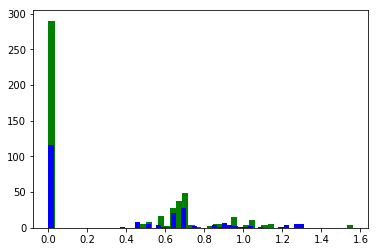

In [7]:
for val in results_de:
    print val
    print len(results_de[val])
    print len(results_en[val])

move_coh_de = results_de['Move variation p-utts']
move_coh_en = results_en['Move variation p-utts']

import matplotlib.pyplot as plt
%matplotlib inline

print 'DE: mean', np.mean(move_coh_de), ' SD', np.var(move_coh_de)**0.5
print 'EN: mean', np.mean(move_coh_en), ' SD', np.var(move_coh_en)**0.5

plt.hist(move_coh_de, bins=50, facecolor='green')
plt.hist(move_coh_en, bins=50, facecolor='blue')

plt.show()

In [4]:
print 'Differences between languages'
for var in results_all:
    ttest =  stats.ttest_ind(results_de[var],results_en[var], equal_var = False)
    if ttest[1] < 0.05:
        print var
        print str(ttest)+'\tSignificantly different'
print '\n'

print 'Differences between players'
ttest =  stats.ttest_ind(results_de['Move alignment e-utts'],results_de['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move alignment e-utts'],results_en['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move alignment e-utts'],results_all['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment all'
    print str(ttest)+'\tSignificantly different'                                                             
                                                                        
ttest =  stats.ttest_ind(results_de['Move coherence e-utts'],results_de['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move coherence e-utts'],results_en['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move coherence e-utts'],results_all['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence all'
    print str(ttest)+'\tSignificantly different' 
                                                                              
ttest =  stats.ttest_ind(results_de['Move alignment e-utts'],results_de['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move alignment e-utts'],results_en['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move alignment e-utts'],results_all['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment all'
    print str(ttest)+'\tSignificantly different'                                                              
                                                                        
ttest =  stats.ttest_ind(results_de['Move variation e-utts'],results_de['Move variation p-utts'])
if ttest[1] < 0.05:
    print 'Players move variation de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move variation e-utts'],results_en['Move variation p-utts'])
if ttest[1] < 0.05:
    print 'Players move variation en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move variation e-utts'],results_all['Move variation p-utts'])
if ttest[1] < 0.05:
    print 'Players move variation all'
    print str(ttest)+'\tSignificantly different'                                                                        

Differences between languages
Move players variation
Ttest_indResult(statistic=-1.9752261105341062, pvalue=0.048629762632864462)	Significantly different
Move variation p-utts
Ttest_indResult(statistic=-2.0797116175546551, pvalue=0.038174106673418605)	Significantly different


Differences between players
Players move variation de
Ttest_indResult(statistic=-2.9650167295201695, pvalue=0.0031246313958450053)	Significantly different
Players move variation en
Ttest_indResult(statistic=-2.9113390411428588, pvalue=0.003817408300197046)	Significantly different
Players move variation all
Ttest_indResult(statistic=-3.9898690499411704, pvalue=7.0460466749955729e-05)	Significantly different


In [5]:
### GAME LEVEL 
def compute_values_game(refexps_dir, success_dir):
    game_level_align = []
    game_level_variation = []
    playergame_level_align_speaker = defaultdict(list)
    playergame_level_variation_speaker = defaultdict(list)

    for dialogue in listdir(refexps_dir):
        dialogue = refexps.load_data(path.join(refexps_dir, dialogue))
        dialogue_game = refexps.gamerun_level(dialogue)
        for obj in dialogue_game:
            refobj = dialogue_game[obj]
            sim_align = []
            sim_align_speaker = defaultdict(list)
            sim_variation_speaker = defaultdict(list)
            sim_variation = []
            align_speaker = {}
            total_n = len(refobj)
            sameform_n =0
            ignore = 0
            entropy_speaker = defaultdict(int)
            total_n_speaker = defaultdict(int)
            sameform_n_speaker = defaultdict(int)
            ignore_speaker = defaultdict(int)
            obj_forms_speaker = defaultdict(dict)
            obj_forms = defaultdict(int)
            for ref in refobj:
                obj_forms[ref[3]] += 1
                speaker = ref[1]
                if not obj_forms_speaker[speaker].has_key(ref[3]):
                    obj_forms_speaker[speaker][ref[3]] = 0
                obj_forms_speaker[speaker][ref[3]] += 1
                align_speaker[speaker] = 0
                total_n_speaker[speaker] +=1
                if get_previous(ref, refobj) == 'no_previous':
                        ignore += 1
                        ignore_speaker[speaker] += 1
                else: 
                    if ref[3] == get_previous(ref, refobj)[3]:
                        sameform_n +=1
                        sameform_n_speaker[speaker] += 1
            sum_forms = sum(obj_forms.values())
            for form in obj_forms:
                obj_forms[form] = float(obj_forms[form])/float(sum_forms)
            obj_forms = obj_forms.values()
            variation = stats.entropy(obj_forms)
            #movelevel variation and alignment (for each object)
            ntotal_n = total_n - ignore
            if ntotal_n != 0:
                align = float(sameform_n) / ntotal_n
                game_level_align.append(align)
            for s in align_speaker:
                ntotal_n = total_n_speaker[s] - ignore_speaker[s]
                if ntotal_n != 0:
                    align = float(sameform_n_speaker[s]) / ntotal_n 
                    playergame_level_align_speaker[s].append(align)
            game_level_variation.append(variation)
            variation_speaker = {}
            for s in obj_forms_speaker:
                sum_forms = sum(obj_forms_speaker[s].values())
                for form in obj_forms_speaker[s]:
                    obj_forms_speaker[s][form] = float(obj_forms_speaker[s][form])/float(sum_forms)
                obj_forms_speaker[s] = obj_forms_speaker[s].values()
                variation_speaker[s] = stats.entropy(obj_forms_speaker[s])
            for s in variation_speaker:
                playergame_level_variation_speaker[s].append(np.mean(variation_speaker[s]))

    game_level_align_all = []
    game_level_variation_all = []

    playergame_level_align_speaker_all = defaultdict(list)
    playergame_level_variation_speaker_all = defaultdict(list)

    results_game = defaultdict(list)

    game_level_align_all += game_level_align
    game_level_variation_all += game_level_variation
    playergame_level_variation = []
    for s in playergame_level_variation_speaker:
        playergame_level_variation += playergame_level_variation_speaker[s]
        playergame_level_variation_speaker_all[s] += playergame_level_variation_speaker[s]
        results_game['game variation '+ s] = playergame_level_variation_speaker[s]
    results_game['game players variation'] = playergame_level_variation
    results_game['game variation'] = game_level_variation
    playergame_level_align = []
    for s in playergame_level_align_speaker:
        playergame_level_align += playergame_level_align_speaker[s]
        playergame_level_align_speaker_all[s] += playergame_level_align_speaker[s]
        results_game['game alignment '+ s] = playergame_level_align_speaker[s]
    results_game['game players alignment'] = playergame_level_align
    results_game['game alignment'] = game_level_align
    
    for value in results_game:
        dataset = results_game[value]
        print '\t'+ value + ': '
        print '\tMean: '+ str(np.mean(dataset)) +'\tStandard deviation: '+ str(np.std(dataset))
        print '\tMax value: ' + str(max(dataset)) + '\tMin value: '+ str(min(dataset))
    return results_game

In [6]:
results_de = compute_values_game(de_dataset_dir, de_success_dir)
print '\n\n'
results_en = compute_values_game(en_dataset_dir, en_success_dir)
print '\n\n'
results_all = compute_values_game(all_dataset_dir, all_success_dir)

	game alignment p-utts: 
	Mean: 0.41777394126	Standard deviation: 0.410771969785
	Max value: 1.0	Min value: 0.0
	game alignment: 
	Mean: 0.444758648009	Standard deviation: 0.389561616647
	Max value: 1.0	Min value: 0.0
	game variation: 
	Mean: 0.628626136662	Standard deviation: 0.459097630771
	Max value: 1.66746193343	Min value: 0.0
	game players alignment: 
	Mean: 0.427261184848	Standard deviation: 0.413666189794
	Max value: 1.0	Min value: 0.0
	game alignment e-utts: 
	Mean: 0.435740933542	Standard deviation: 0.416052971017
	Max value: 1.0	Min value: 0.0
	game players variation: 
	Mean: 0.529121470895	Standard deviation: 0.438072077063
	Max value: 1.56071040904	Min value: 0.0
	game variation p-utts: 
	Mean: 0.575499116033	Standard deviation: 0.431441333436
	Max value: 1.56071040904	Min value: 0.0
	game variation e-utts: 
	Mean: 0.434157721326	Standard deviation: 0.43622290804
	Max value: 1.38314875125	Min value: 0.0



	game alignment p-utts: 
	Mean: 0.45462962963	Standard deviation: 0

In [7]:
print 'Differences between languages'
for var in results_all:
    ttest =  stats.ttest_ind(results_de[var],results_en[var], equal_var = False)
    if ttest[1] < 0.05:
        print var
        print str(ttest)+'\tSignificantly different'
print '\n'

print 'Differences between players'
ttest =  stats.ttest_ind(results_de['Move alignment e-utts'],results_de['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move alignment e-utts'],results_en['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move alignment e-utts'],results_all['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment all'
    print str(ttest)+'\tSignificantly different'                                                             
                                                                        
ttest =  stats.ttest_ind(results_de['Move coherence e-utts'],results_de['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move coherence e-utts'],results_en['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move coherence e-utts'],results_all['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence all'
    print str(ttest)+'\tSignificantly different' 

ttest =  stats.ttest_ind(results_de['game alignment e-utts'],results_de['game alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players game alignment de'
    print str(ttest)+'\tSignificantly different'


ttest =  stats.ttest_ind(results_en['game alignment e-utts'],results_en['game alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players game alignment en'
    print str(ttest)+'\tSignificantly different'
                                                                        

ttest =  stats.ttest_ind(results_all['game alignment e-utts'],results_all['game alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players game alignment all'
    print str(ttest)+'\tSignificantly different'                                                              
                                                                        

ttest =  stats.ttest_ind(results_de['game variation e-utts'],results_de['game variation p-utts'])
if ttest[1] < 0.05:
    print 'Players game variation de'
    print str(ttest)+'\tSignificantly different'


ttest =  stats.ttest_ind(results_en['game variation e-utts'],results_en['game variation p-utts'])
if ttest[1] < 0.05:
    print 'Players game variation en'
    print str(ttest)+'\tSignificantly different'
                                                                        

ttest =  stats.ttest_ind(results_all['game variation e-utts'],results_all['game variation p-utts'])
if ttest[1] < 0.05:
    print 'Players game variation all'
    print str(ttest)+'\tSignificantly different'                 

Differences between languages


Differences between players
Players game variation de
Ttest_indResult(statistic=-2.9954419186139449, pvalue=0.0029191307913059286)	Significantly different
Players game variation en
Ttest_indResult(statistic=-4.0226494297784656, pvalue=7.5794381245664758e-05)	Significantly different
Players game variation all
Ttest_indResult(statistic=-4.960286717400674, pvalue=9.0305010337667802e-07)	Significantly different
